In [1]:
import statsmodels.formula.api as smf

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import f1_score, roc_curve, auc, precision_score, recall_score
import seaborn as sns

from sklearn.preprocessing import scale

from sklearn.tree import export_graphviz
import graphviz

In [19]:
process = pd.read_csv('data/MFG_PROCESS.csv', encoding='EUCKR')
process.head()

,JUDGE,LOT_ID,PANEL_ID,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,TIME_7PASTE,...,PHOS_FIRE_TEMP_KEEP_CH03,PHOS_FIRE_TEMP_KEEP_CH04,PHOS_FIRE_TEMP_ANEAL_CH01,PHOS_FIRE_TEMP_ANEAL_CH02,PHOS_FIRE_TEMP_ANEAL_CH03,PHOS_FIRE_TEMP_ANEAL_CH04,PHOS_FIRE_EXHAUST_HEAT1,PHOS_FIRE_EXHAUST_HEAT2,PHOS_FIRE_EXHAUST_HEAT3,PHOS_FIRE_EXHAUST_HEAT4
0,양품,LOT-101,PNL-01,2019-04-01T00:01,2019-04-01T05:21,2019-04-01T11:01,2019-04-06T13:41,2019-04-11T03:41,2019-04-03T20:20,2019-04-11T12:41,...,480.0,475.0,443.0,419.0,392.0,372.0,4115.0,3973.0,4432.0,2506.0
1,양품,LOT-101,PNL-02,2019-04-01T00:45,2019-04-01T06:05,2019-04-01T11:45,2019-04-06T14:25,2019-04-11T04:25,2019-04-03T21:04,2019-04-11T13:25,...,480.0,475.0,445.0,423.0,395.0,374.0,3642.0,4097.0,4499.0,2573.0
2,양품,LOT-101,PNL-03,2019-04-01T01:29,2019-04-01T06:49,2019-04-01T12:29,2019-04-06T15:09,2019-04-11T05:09,2019-04-03T21:48,2019-04-11T14:09,...,480.0,475.0,444.0,421.0,393.0,372.0,4063.0,3972.0,4460.0,2502.0
3,양품,LOT-101,PNL-04,2019-04-01T02:13,2019-04-01T07:33,2019-04-01T13:13,2019-04-06T15:53,2019-04-11T05:53,2019-04-03T22:32,2019-04-11T14:53,...,480.0,475.0,444.0,420.0,393.0,372.0,4131.0,4011.0,4466.0,2522.0
4,양품,LOT-101,PNL-05,2019-04-01T02:58,2019-04-01T08:18,2019-04-01T13:58,2019-04-06T16:38,2019-04-11T06:38,2019-04-03T23:17,2019-04-11T15:38,...,480.0,475.0,443.0,420.0,392.0,372.0,3632.0,4073.0,4482.0,2584.0


In [20]:
process.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'TIME_1BLACK', 'TIME_2AG', 'TIME_3BUS',
       'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       ...
       'PHOS_FIRE_TEMP_KEEP_CH03', 'PHOS_FIRE_TEMP_KEEP_CH04',
       'PHOS_FIRE_TEMP_ANEAL_CH01', 'PHOS_FIRE_TEMP_ANEAL_CH02',
       'PHOS_FIRE_TEMP_ANEAL_CH03', 'PHOS_FIRE_TEMP_ANEAL_CH04',
       'PHOS_FIRE_EXHAUST_HEAT1', 'PHOS_FIRE_EXHAUST_HEAT2',
       'PHOS_FIRE_EXHAUST_HEAT3', 'PHOS_FIRE_EXHAUST_HEAT4'],
      dtype='object', length=107)

In [21]:
machine = pd.read_csv('data/MFG_MACHINE.csv', encoding='EUCKR')
machine.head()

,JUDGE,LOT_ID,PANEL_ID,DATE_1BLACK,TIME_1BLACK,TIME_2AG,TIME_3BUS,TIME_4DIELEC,TIME_5MGO,TIME_6PHOS,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,양품,LOT-101,PNL-01,2019-04-01,2019-04-01 0:01,2019-04-01 5:21,2019-04-01 11:01,2019-04-06 13:41,2019-04-11 3:41,2019-04-03 20:20,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,양품,LOT-101,PNL-02,2019-04-01,2019-04-01 0:45,2019-04-01 6:05,2019-04-01 11:45,2019-04-06 14:25,2019-04-11 4:25,2019-04-03 21:04,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
2,양품,LOT-101,PNL-03,2019-04-01,2019-04-01 1:29,2019-04-01 6:49,2019-04-01 12:29,2019-04-06 15:09,2019-04-11 5:09,2019-04-03 21:48,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
3,양품,LOT-101,PNL-04,2019-04-01,2019-04-01 2:13,2019-04-01 7:33,2019-04-01 13:13,2019-04-06 15:53,2019-04-11 5:53,2019-04-03 22:32,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
4,양품,LOT-101,PNL-05,2019-04-01,2019-04-01 2:58,2019-04-01 8:18,2019-04-01 13:58,2019-04-06 16:38,2019-04-11 6:38,2019-04-03 23:17,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기


In [22]:
machine.columns

Index(['JUDGE', 'LOT_ID', 'PANEL_ID', 'DATE_1BLACK', 'TIME_1BLACK', 'TIME_2AG',
       'TIME_3BUS', 'TIME_4DIELEC', 'TIME_5MGO', 'TIME_6PHOS', 'TIME_7PASTE',
       'TIME_8AGING', 'MC_1BLACK_1PRINT', 'MC_1BLACK_2RTD', 'MC_2AG_1PRINT',
       'MC_2AG_2RTD', 'MC_2AG_3EXPOSURE', 'MC_3BUS_1DEVELOP', 'MC_3BUS_2FIRE',
       'MC_4DIELEC_1FIRE', 'MC_5MGO', 'MC_6PHOS_1R_1DISPENSER',
       'MC_6PHOS_1R_2DRY', 'MC_6PHOS_2G_1DISPENSER', 'MC_6PHOS_2G_2DRY',
       'MC_6PHOS_3B_1DISPENSER', 'MC_6PHOS_4FIRE', 'MC_7PASTE', 'MC_8AGING'],
      dtype='object')

In [23]:
process['JUDGE'] = process['JUDGE'].map({'양품':0, '명점':1})

In [24]:
def fun_plot_hist(data, var):
    plt.hist(data[data['JUDGE']==0][var], label = '양품', alpha = 0.5)
    plt.hist(data[data['JUDGE']==1][var], label = '불량', alpha = 0.5)
    plt.legend()

In [36]:
process1 = process[['JUDGE', 'LOT_ID','PANEL_ID','DIELEC_FIRE_EXHAUST_HEAT5']]
process1.head()

,JUDGE,LOT_ID,PANEL_ID,DIELEC_FIRE_EXHAUST_HEAT5
0,0,LOT-101,PNL-01,3283.0
1,0,LOT-101,PNL-02,3971.0
2,0,LOT-101,PNL-03,3324.0
3,0,LOT-101,PNL-04,3306.0
4,0,LOT-101,PNL-05,3900.0


In [37]:
process2 = process[['JUDGE', 'LOT_ID','PANEL_ID','BUS_DEVELOP_TEMP_TANK2']]
process2.head()

,JUDGE,LOT_ID,PANEL_ID,BUS_DEVELOP_TEMP_TANK2
0,0,LOT-101,PNL-01,30.7528
1,0,LOT-101,PNL-02,30.8000
2,0,LOT-101,PNL-03,30.6935
3,0,LOT-101,PNL-04,30.6909
4,0,LOT-101,PNL-05,31.0316


In [38]:
machine1 = machine[['JUDGE', 'LOT_ID','PANEL_ID','MC_4DIELEC_1FIRE']]
machine1.head()

,JUDGE,LOT_ID,PANEL_ID,MC_4DIELEC_1FIRE
0,0,LOT-101,PNL-01,3호기
1,0,LOT-101,PNL-02,3호기
2,0,LOT-101,PNL-03,3호기
3,0,LOT-101,PNL-04,3호기
4,0,LOT-101,PNL-05,3호기


In [39]:
machine2 = machine[['JUDGE', 'LOT_ID','PANEL_ID','MC_3BUS_1DEVELOP']]
machine2.head()

,JUDGE,LOT_ID,PANEL_ID,MC_3BUS_1DEVELOP
0,0,LOT-101,PNL-01,1호기
1,0,LOT-101,PNL-02,1호기
2,0,LOT-101,PNL-03,1호기
3,0,LOT-101,PNL-04,1호기
4,0,LOT-101,PNL-05,1호기


In [40]:
machine['JUDGE'] = machine['JUDGE'].map({'양품':0, '명점':1})

In [41]:
process1_machine1 = pd.merge(process1, machine1, on=['LOT_ID','PANEL_ID', 'JUDGE'])
process1_machine1.head()

,JUDGE,LOT_ID,PANEL_ID,DIELEC_FIRE_EXHAUST_HEAT5,MC_4DIELEC_1FIRE
0,0,LOT-101,PNL-01,3283.0,3호기
1,0,LOT-101,PNL-02,3971.0,3호기
2,0,LOT-101,PNL-03,3324.0,3호기
3,0,LOT-101,PNL-04,3306.0,3호기
4,0,LOT-101,PNL-05,3900.0,3호기


In [42]:
process2_machine2 = pd.merge(process2, machine2, on=['LOT_ID','PANEL_ID', 'JUDGE'])
process2_machine2.head()

,JUDGE,LOT_ID,PANEL_ID,BUS_DEVELOP_TEMP_TANK2,MC_3BUS_1DEVELOP
0,0,LOT-101,PNL-01,30.7528,1호기
1,0,LOT-101,PNL-02,30.8000,1호기
2,0,LOT-101,PNL-03,30.6935,1호기
3,0,LOT-101,PNL-04,30.6909,1호기
4,0,LOT-101,PNL-05,31.0316,1호기


C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54408 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48520 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0

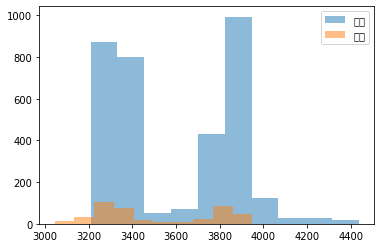

In [17]:
fun_plot_hist(process1, 'DIELEC_FIRE_EXHAUST_HEAT5')

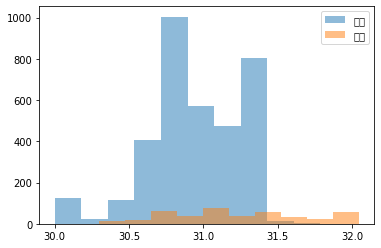

In [18]:
fun_plot_hist(process2, 'BUS_DEVELOP_TEMP_TANK2')

In [32]:
round(process1['JUDGE'].mean(),3)

0.107

In [33]:
round(process1[process1['DIELEC_FIRE_EXHAUST_HEAT5']>=3243]['JUDGE'].mean(),3)

0.093

In [34]:
round(process1[process1['DIELEC_FIRE_EXHAUST_HEAT5']<3243]['JUDGE'].mean(),3)

0.673

In [44]:
# 1호기 불량률
round(process1_machine1[(process1_machine1['MC_4DIELEC_1FIRE']=='1호기')]['JUDGE'].mean(),3)

0.109

In [54]:
# 2호기 불량률
round(process1_machine1[(process1_machine1['MC_4DIELEC_1FIRE']=='2호기')]['JUDGE'].mean(),3)

0.127

In [53]:
# 1호기& 48도 미만
round(process1_machine1[(process1_machine1['MC_4DIELEC_1FIRE']=='1호기')&(process1['DIELEC_FIRE_EXHAUST_HEAT5']>=3243)]['JUDGE'].mean(),3)

0.098

In [52]:
round(process1_machine1[(process1_machine1['MC_4DIELEC_1FIRE']=='1호기')&(process1['DIELEC_FIRE_EXHAUST_HEAT5']<3243)]['JUDGE'].mean(),3)

0.7

In [50]:
# 2호기& 48도 이상
round(process1_machine1[(process1_machine1['MC_4DIELEC_1FIRE']=='2호기')&(process1['DIELEC_FIRE_EXHAUST_HEAT5']>=48)]['JUDGE'].mean(),3)

0.13

In [51]:
round(process1_machine1[(process1_machine1['MC_4DIELEC_1FIRE']=='2호기')&(process1['DIELEC_FIRE_EXHAUST_HEAT5']<48)]['JUDGE'].mean(),3)

nan